In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Before run this script, run program that generate learn.txt and test_during_learn.txt files

In [2]:
df_l = pd.read_csv("n_learn_evaluting_Threshold.txt", sep=';')

In [3]:
df_l.head()

,MapNumber,EpochNumber,distortion,distortion_gss,quantization,quantization_gss
0,0,0,1.117605,0,0.059252,0
1,0,1,0.703316,0,0.086659,0
2,0,2,0.780408,0,0.091403,0
3,0,3,0.730781,0,0.093872,0
4,0,4,0.740233,0,0.105401,0


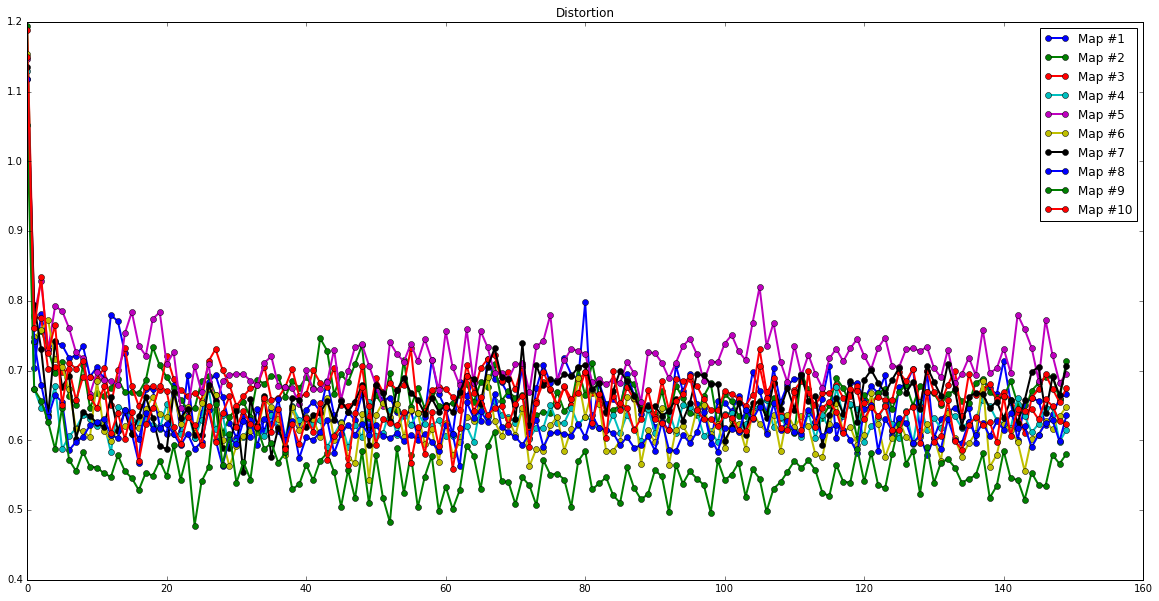

In [4]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_l.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Distortion')
    plt.plot(df_l[df_l['MapNumber']==i].reset_index(drop=True)['distortion'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

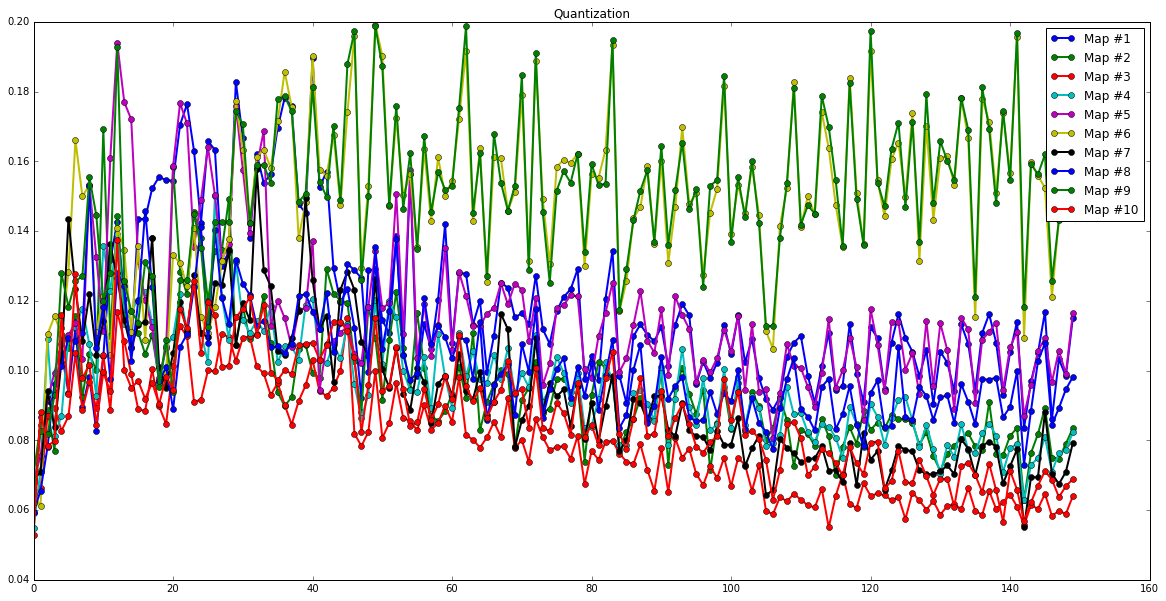

In [5]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_l.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Quantization')
    plt.plot(df_l[df_l['MapNumber']==i].reset_index(drop=True)['quantization'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

## Test during learning (valid)

In [6]:
df_v = pd.read_csv("n_valid_evaluting_Threshold.txt", sep=';')
df_v.head()

,MapNumber,EpochNumber,distortion,distortion_gss,quantization,quantization_gss
0,0,0,1.136438,0,0.061756,0
1,0,1,0.770990,0,0.081789,0
2,0,2,0.698120,0,0.098188,0
3,0,3,0.713595,0,0.092263,0
4,0,4,0.644245,0,0.102730,0


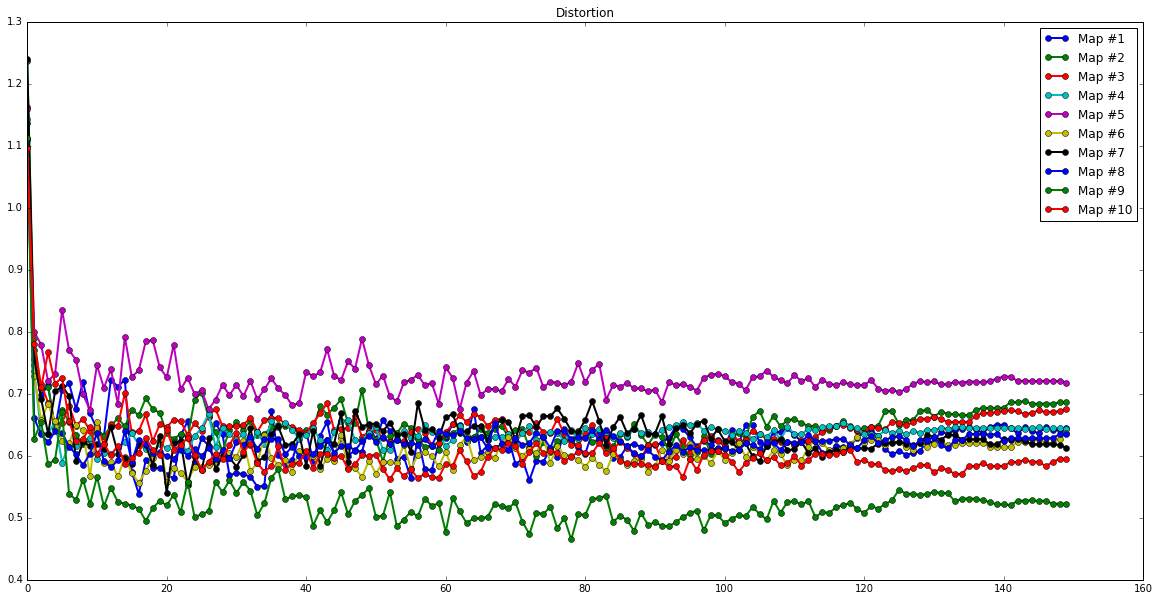

In [7]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_v.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Distortion')
    plt.plot(df_v[df_v['MapNumber']==i].reset_index(drop=True)['distortion'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

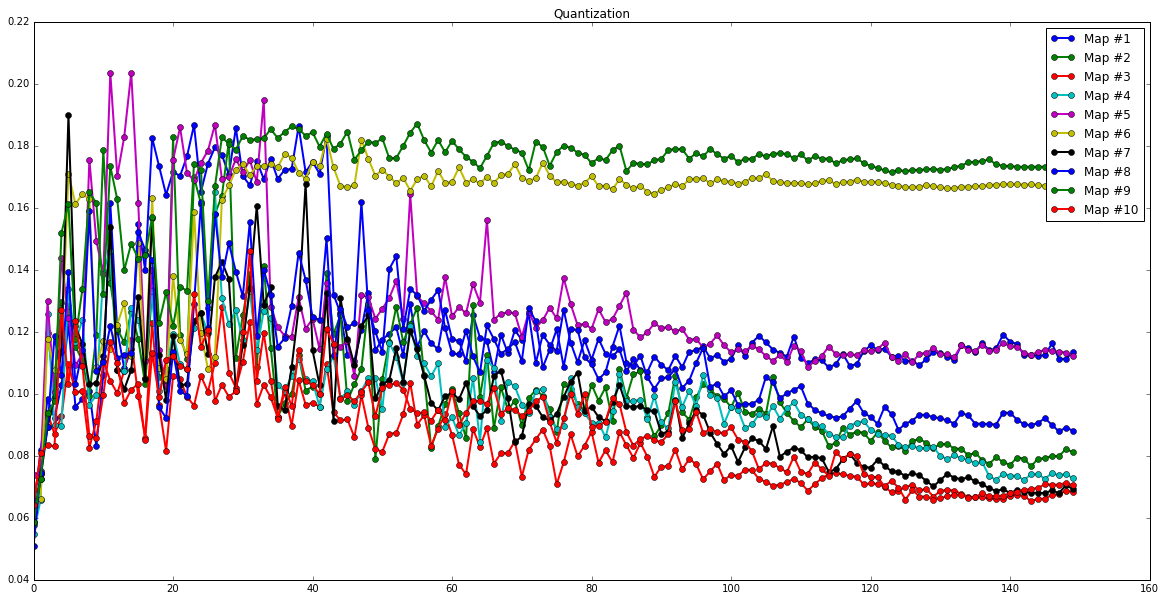

In [8]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_v.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Quantization')
    plt.plot(df_v[df_v['MapNumber']==i].reset_index(drop=True)['quantization'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

In [11]:
df_s = pd.read_csv("n_statistics_Threshold.txt", sep=';')
df_s.tail()

,Epoch,PercentageFaults,avg,avg_gss,avg_faulty,avg_gss_faulty,avgdist,avgdist_gss,avgdist_faulty,avgdist_gss_faulty,stddev,stddev_gss,stddev_faulty,stddev_gss_faulty,stddevdist,stddevdist_gss,stddevdist_faulty,stddevdist_gss_faulty
4525,150,25,0.094692,0,0.238094,0,0.632548,0,955.834347,0,0.043227,0,0.066322,0,0.05495,0,115.390419,0
4526,150,26,0.094692,0,0.268135,0,0.632548,0,1013.583092,0,0.043227,0,0.089356,0,0.05495,0,124.522285,0
4527,150,27,0.094692,0,0.289539,0,0.632548,0,1047.799215,0,0.043227,0,0.092554,0,0.05495,0,147.466690,0
4528,150,28,0.094692,0,0.321961,0,0.632548,0,1111.944388,0,0.043227,0,0.126383,0,0.05495,0,140.268814,0
4529,150,29,0.094692,0,0.342513,0,0.632548,0,1146.822220,0,0.043227,0,0.161598,0,0.05495,0,166.188400,0


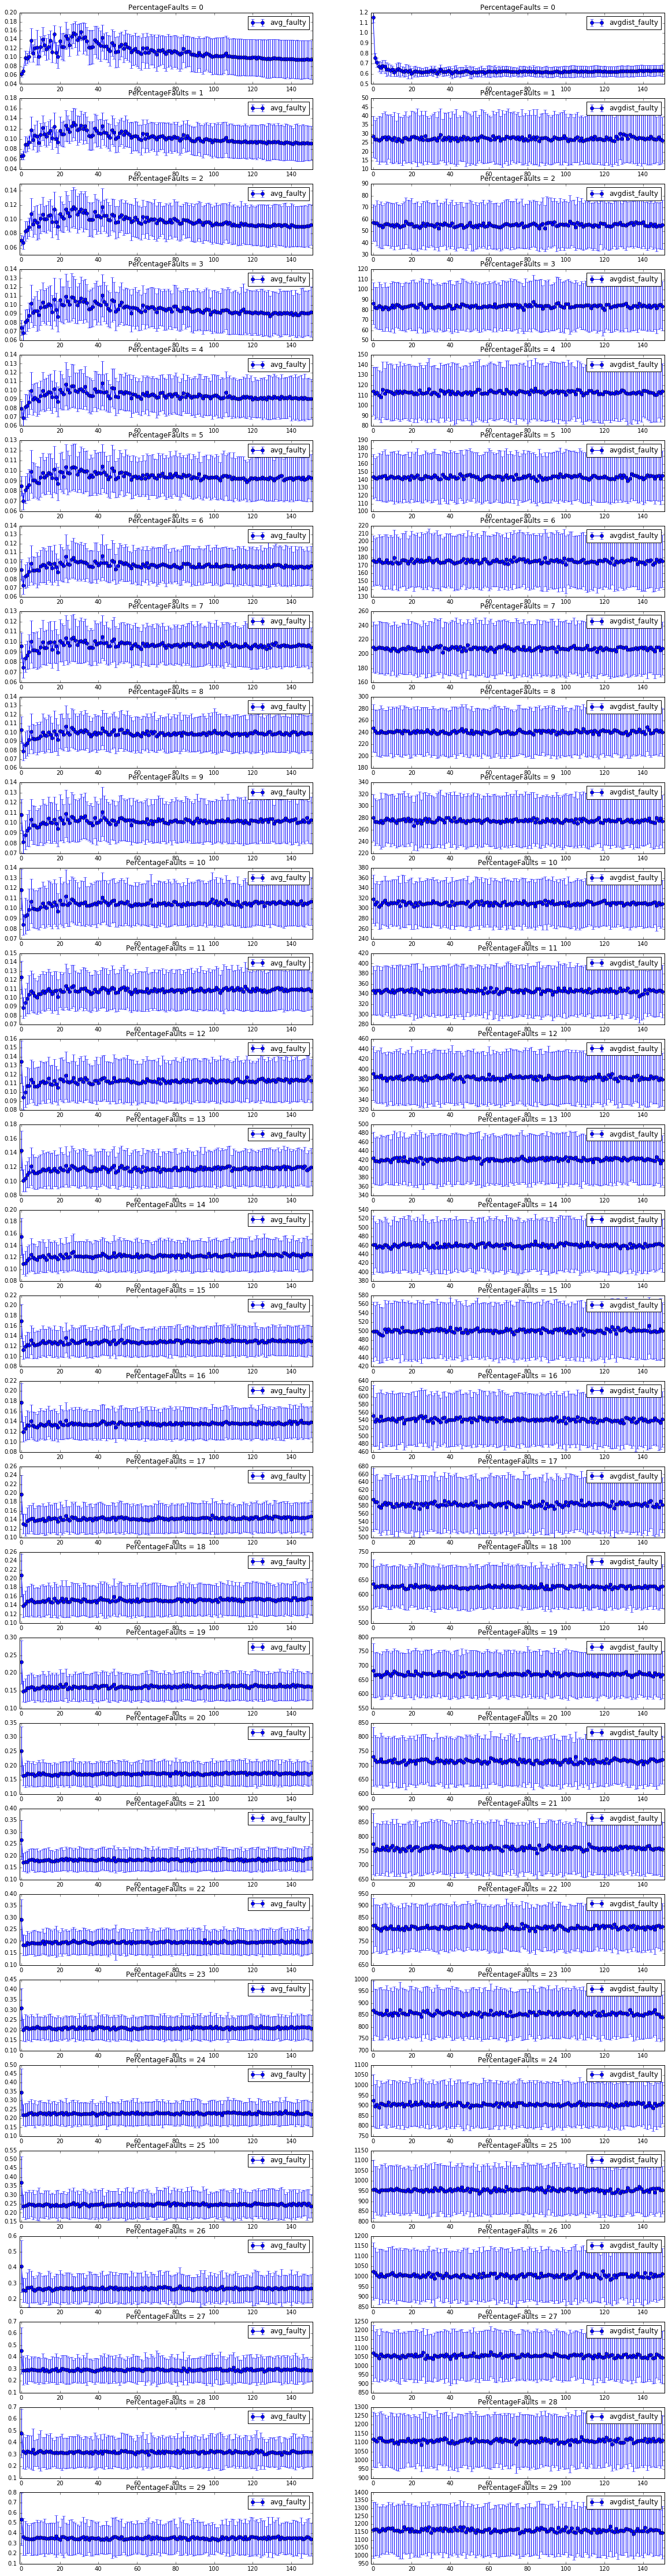

In [10]:
width = 20
height = 400
plt.figure(figsize=(width, height))
num = len(df_s['Epoch'].unique())
k = 1
for i in df_s['PercentageFaults'].unique():
    avg = df_s[df_s['PercentageFaults']==i].filter(regex=".*[^s]_faulty").filter(regex="avg.*").reset_index(drop=True)
    avg_iter = avg.__iter__()
    stddev = df_s[df_s['PercentageFaults']==i].filter(regex=".*[^s]_faulty").filter(regex="stddev.*").reset_index(drop=True)
    stddev_iter = stddev.__iter__()
    for j in range(0,2):
        plt.subplot(num,2,k)
        plt.xlim([-1, num])
        plt.title('PercentageFaults = ' + str(i))
        plt.errorbar(range(0,num), avg[avg_iter.__next__()], yerr=stddev[stddev_iter.__next__()], fmt='-o')
        plt.legend()
        k += 1